In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


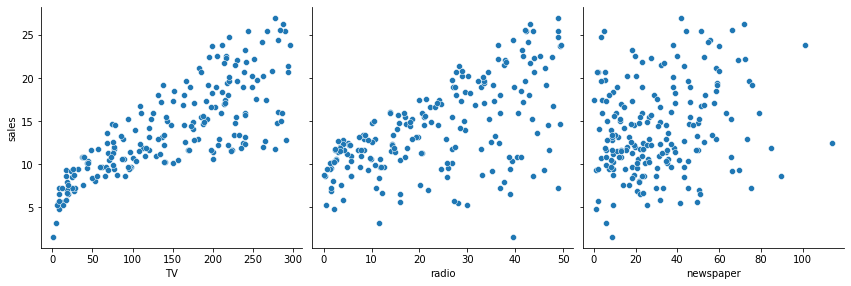

In [4]:
sns.pairplot(data=df,x_vars=['TV','radio','newspaper'],y_vars=['sales'],height=4)

In [5]:
X=df.drop('sales',axis=1)

In [6]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y=df['sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [11]:
X_train


,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [12]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [13]:
len(X_test)

60

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [16]:
mdl = LinearRegression()

In [17]:
mdl.fit(X_train,y_train)

LinearRegression()

In [18]:
predictions=mdl.predict(X_test)

In [19]:
mdl.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [20]:
list(zip(X,mdl.coef_))

[('TV', 0.044059280957465224),
 ('radio', 0.19928749689893951),
 ('newspaper', 0.006882452222275479)]

In [21]:
mdl.intercept_

2.7089490925159048

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
mdl.score(X,y)

0.8938708191740676

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

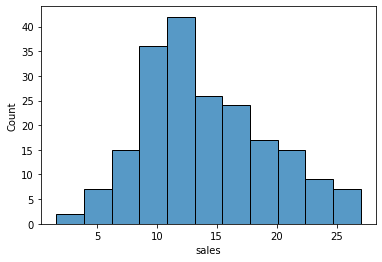

In [26]:
sns.histplot(x='sales',data=df)

In [27]:
mean_absolute_error(y_test,predictions)

1.5116692224549086

In [28]:
a=mean_squared_error(y_test,predictions)

In [29]:
a

3.7967972367152183

In [30]:
# Root mean squared error
np.sqrt(a)

1.9485372043446383

In [31]:
residuals = y_test - predictions

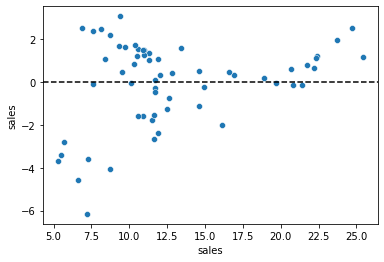

In [32]:
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color='black',ls='--')  #?

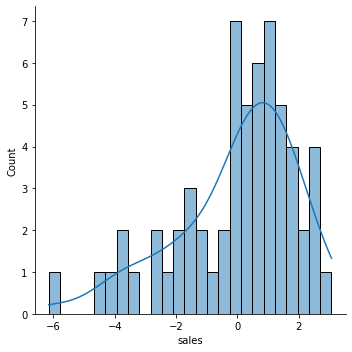

In [33]:
sns.displot(residuals,bins=25,kde=True)

In [34]:
import scipy as sp

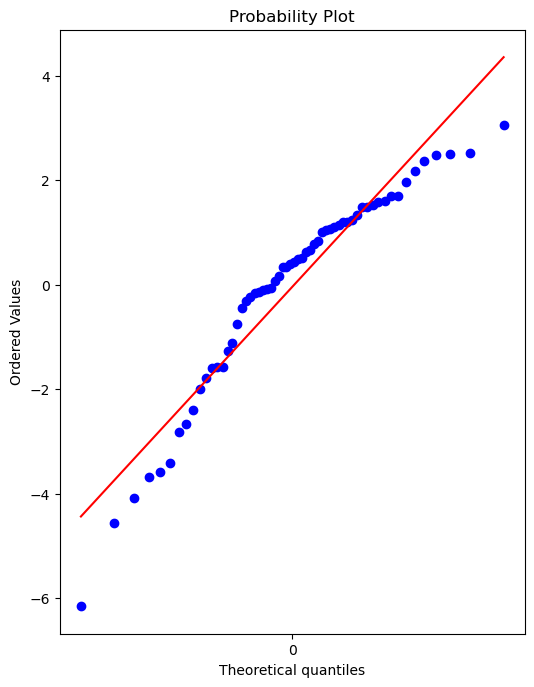

In [35]:
fig,ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
sns.barplot()
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(residuals,plot=ax) #?

# Model Deployment

In [36]:
new_model = LinearRegression()

In [37]:
new_model.fit(X,y)

LinearRegression()

In [38]:
new_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [39]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [40]:
y_pred = new_model.predict(X)

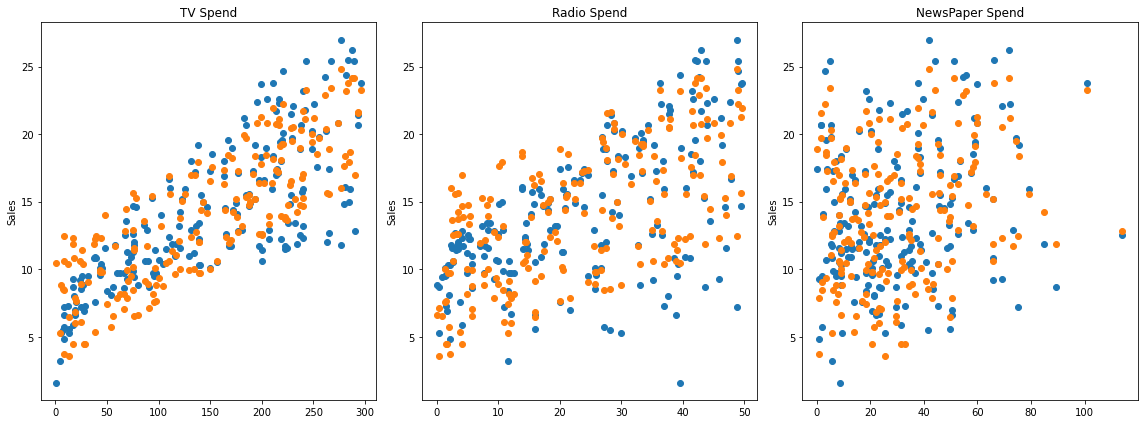

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_pred,'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_pred,'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_pred,'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('NewsPaper Spend')
plt.tight_layout()

In [42]:
#here all tv,radio,newspaper are of same units 
#i.e. may be in dollar or in rupee , but in datasets like
# house predicting where house area and no. of bedrooms are in
#different units so to put linear regression model on that 
#we first have to normalize the features.

# Saving the model

In [43]:
from joblib import dump,load

In [44]:
dump(new_model,'new_sales_model.joblib')

['new_sales_model.joblib']

In [45]:
loaded_model = load('new_sales_model.joblib')

In [46]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [47]:
#150TV, 25Radio, 12 NewsPaper
a = [[150,25,12]]

In [48]:
loaded_model.predict(a)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.50438669])